In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
import warnings
warnings.filterwarnings("ignore")
data = pd.read_csv("student-data.csv")

In [2]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [3]:
data.shape

(395, 31)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [5]:
#check for null values
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

no null values

<function matplotlib.pyplot.show(close=None, block=None)>

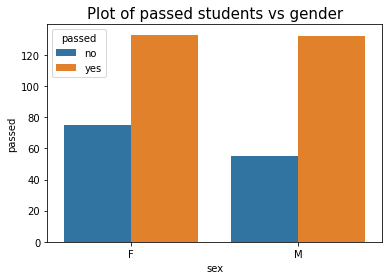

In [6]:
#plotting passed students count with respect to gender
sns.countplot(data["sex"],hue=data["passed"])
plt.title("Plot of passed students vs gender",fontsize=15)
plt.xlabel('sex')
plt.ylabel('passed')
plt.show

In [7]:
data['sex']

0      F
1      F
2      F
3      F
4      F
      ..
390    M
391    M
392    M
393    M
394    M
Name: sex, Length: 395, dtype: object

In [8]:
#Using the label encoder and one hot encoder to transfrom data 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_en= LabelEncoder()
a=['school','Mjob', 'Fjob', 'reason', 'guardian','higher','passed','address','famsize','Pstatus','schoolsup', 'famsup', 'paid']
for i in np.arange(len(a)):
    data[a[i]]= label_en.fit_transform(data[a[i]])
data= pd.get_dummies(data, columns=[ 'activities', 'nursery', 'internet', 'romantic', 'sex'])

In [9]:
#selecting variables x and y

x=data.drop(['passed'],axis=1)
y=data['passed']

In [10]:
#importing train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [11]:
#Importing logistic regression
from sklearn.linear_model import LogisticRegression
l_model = LogisticRegression()
l_model.fit(x_train,y_train)
pred = l_model.predict(x_test)

In [12]:
#Checking the scores of the model
print('Accuracy Score is:', accuracy_score(y_test, pred))
print('Recall Score is:', recall_score(y_test, pred))
print('Precision Score:', precision_score(y_test, pred))
print('F1 score is:', f1_score(y_test, pred))

Accuracy Score is: 0.7215189873417721
Recall Score is: 0.9230769230769231
Precision Score: 0.7272727272727273
F1 score is: 0.8135593220338984


In [13]:
confusion_matrix(y_test,pred)

array([[ 9, 18],
       [ 4, 48]], dtype=int64)

In [14]:
#KNN MODEL

#Importing KNN model and fitting the model
from sklearn.neighbors import KNeighborsClassifier
acc_value = []
neighbours = np.arange(3,15)
for k in neighbours:
     classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
     classifier.fit(x_train,y_train)
     pred = classifier.predict(x_test)
     acc = accuracy_score(y_test,pred)
     acc_value.append(acc)

In [15]:
acc_value

[0.6835443037974683,
 0.6582278481012658,
 0.6962025316455697,
 0.6835443037974683,
 0.6962025316455697,
 0.6835443037974683,
 0.6962025316455697,
 0.7215189873417721,
 0.6835443037974683,
 0.6962025316455697,
 0.6835443037974683,
 0.6962025316455697]

Text(0, 0.5, 'accuracy')

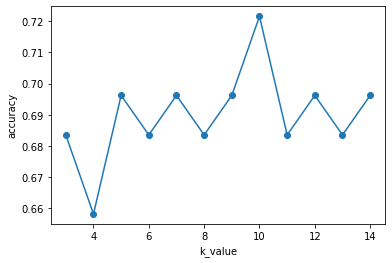

In [16]:
plt.plot(neighbours, acc_value, 'o-')
plt.xlabel('k_value')
plt.ylabel('accuracy')

here we choose k as 10

In [17]:
classifier=KNeighborsClassifier(n_neighbors=10,metric='minkowski')
classifier.fit(x_train,y_train)
pred = classifier.predict(x_test)

In [18]:
#Checking the scores of the model
print('Accuracy Score is:', accuracy_score(y_test, pred))
print('Recall Score is:', recall_score(y_test, pred))
print('Precision Score:', precision_score(y_test, pred))
print('F1 score is:', f1_score(y_test, pred))

Accuracy Score is: 0.7215189873417721
Recall Score is: 0.9615384615384616
Precision Score: 0.7142857142857143
F1 score is: 0.819672131147541


In [19]:
confusion_matrix(y_test,pred)


array([[ 7, 20],
       [ 2, 50]], dtype=int64)

In [20]:
# Importing the SVM model and fitting the model
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)
pred_SVC= classifier.predict(x_test)

In [21]:
# Checking the value score for SVM models
print('Accuracy Score is:', accuracy_score(y_test, pred_SVC))
print('Recall Score is:', recall_score(y_test, pred_SVC))
print('Precision Score:', precision_score(y_test, pred_SVC))
print('F1 score is:', f1_score(y_test, pred_SVC))

Accuracy Score is: 0.6582278481012658
Recall Score is: 1.0
Precision Score: 0.6582278481012658
F1 score is: 0.7938931297709924


In [22]:
#Importing the Randomforest algorithum and fitting the model
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(x_train, y_train)
pred= rf.predict(x_test)

In [23]:
#Checking the scores of the model
print('Accuracy Score is:', accuracy_score(y_test, pred))
print('Recall Score is:', recall_score(y_test, pred))
print('Precision Score:', precision_score(y_test, pred))
print('F1 score is:', f1_score(y_test, pred))

Accuracy Score is: 0.6835443037974683
Recall Score is: 0.9230769230769231
Precision Score: 0.6956521739130435
F1 score is: 0.7933884297520661


In [24]:
confusion_matrix(y_test, pred)

array([[ 6, 21],
       [ 4, 48]], dtype=int64)

**Based on the tested models KNN model shows better results in terms of f1 score, accuracy and precision score**